In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 12)
pd.set_option('display.max_colwidth', 200)

# Utilities

In [3]:
def eval_w(x):
    try:
        return eval(x)
    except Exception as e:
        print(x, e)
        return []

def check_list_lengths(series):
    return series.apply(lambda x: len(x)).value_counts()
        
def np_from_str(string):
    string = string.replace("[]","").replace("]","").replace("[","").replace(".","")
    float_list = [float(i.strip()) for i in string.split()]
    return float_list

# Main

In [135]:
inputfile = "../data/TactSim_Draft4.pkl"

In [140]:
sim_df_v2 = pd.read_pickle("../data/TactSim-Draft2.pkl")
sim_df_v2['FiringRate'] = sim_df_v2['FiringRate'].apply(lambda x: tuple(x.astype("float16")))
sim_df_v2['Spikes'] = sim_df_v2['Spikes'].apply(lambda x: tuple(x.astype("float16")))

print(sim_df_v2.shape)
sim_df_v2[:3]

(12499, 7)


,FiringRate,Spikes,Frequency,depth,Afferent_Class,duration,Pin_Radius
0,"(95.3,)","(0.001, 0.0098, 0.02, 0.0304, 0.0408, 0.0514, 0.0618, 0.0724, 0.0828, 0.0934, 0.104, 0.1144, 0.125, 0.1354, 0.146, 0.1566, 0.167, 0.1776, 0.1882, 0.1986, 0.2092, 0.2196, 0.2302, 0.2408, 0.2512, 0....",95,1.60,PC,1.763,1.07
1,"(130.6,)","(0.001, 0.0064, 0.013, 0.0206, 0.028, 0.0358, 0.0432, 0.051, 0.0584, 0.0664, 0.0738, 0.0818, 0.0892, 0.0972, 0.1046, 0.1124, 0.1198, 0.1278, 0.1353, 0.1432, 0.1506, 0.1586, 0.166, 0.174, 0.1814, 0...",65,0.58,PC,1.034,1.39
2,"(0.7627,)","(0.0494,)",95,2.04,RA,1.311,1.38


In [149]:
sim_df = pd.read_pickle(inputfile)
sim_df['FiringRate'] = sim_df['FiringRate'].apply(lambda x: tuple(x.astype("float16")))
sim_df['Spikes'] = sim_df['Spikes'].apply(lambda x: tuple(x.astype("float16")))
print(sim_df.shape)
sim_df[:3]

(37149, 7)


,FiringRate,Spikes,Frequency,depth,Afferent_Class,duration,Pin_Radius
0,"(0.0,)",(),25,2.79,SA1,1.110,0.76
1,"(0.0,)",(),65,0.50,SA1,1.824,0.70
2,"(0.0,)",(),25,0.42,SA1,1.139,1.31


In [150]:
sim_df_v3 = pd.concat(
    [sim_df_v2["FiringRate	Spikes	Frequency	Afferent_Class depth Pin_Radius duration".split()],
     sim_df]
).drop_duplicates()

sim_df_v3.shape

(49648, 7)

In [151]:
sim_df = sim_df_v3

# Notes

- 21.5k Samples & 7 Columns
- Columns
  - Predictors
      - FiringRate
      - Spikes
      - Afferent_Class
  - Target
      - Frequency

## check data: FiringRate

- Contains list with only one value

In [152]:
check_list_lengths(sim_df["FiringRate"])

1    49648
Name: FiringRate, dtype: int64

In [176]:
sim_df["FiringRate_value"] = sim_df["FiringRate"].apply(lambda x: x[0])
sim_df[:3]

,FiringRate,Spikes,Frequency,Afferent_Class,depth,Pin_Radius,duration,FiringRate_value,Spikes_n_items
0,"(95.3,)","(0.001, 0.0098, 0.02, 0.0304, 0.0408, 0.0514, 0.0618, 0.0724, 0.0828, 0.0934, 0.104, 0.1144, 0.125, 0.1354, 0.146, 0.1566, 0.167, 0.1776, 0.1882, 0.1986, 0.2092, 0.2196, 0.2302, 0.2408, 0.2512, 0....",95,PC,1.60,1.070,1.7630,95.3125,168
1,"(130.6,)","(0.001, 0.0064, 0.013, 0.0206, 0.028, 0.0358, 0.0432, 0.051, 0.0584, 0.0664, 0.0738, 0.0818, 0.0892, 0.0972, 0.1046, 0.1124, 0.1198, 0.1278, 0.1353, 0.1432, 0.1506, 0.1586, 0.166, 0.174, 0.1814, 0...",65,PC,0.58,1.390,1.0340,130.6250,135
2,"(35.25,)","(0.0262, 0.05, 0.0798, 0.104, 0.1344, 0.1584, 0.189, 0.2133, 0.2434, 0.2673, 0.298, 0.322, 0.3525, 0.3765, 0.407, 0.4312, 0.4617, 0.4856, 0.516, 0.54, 0.571, 0.5947, 0.625, 0.6494, 0.6797, 0.7036,...",55,PC,1.30,0.825,1.0215,35.2500,36


## check data: Spikes

| num of items | num of samples |
| -- | -- |
| 0 |   10914 | 
| 1 |     314 | 
| 2 |      165 | 
| 3 |       102 | 
| 4 |        78 | 
Sum = 11573

In [177]:
# sim_df["Spikes"].apply(lambda x: len(x)).value_counts()[:30] # len of string

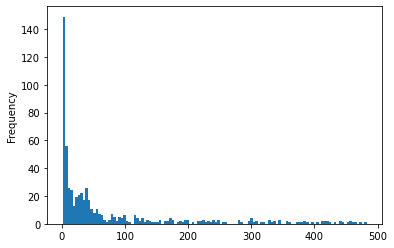

In [178]:
sim_df["Spikes_n_items"] = sim_df["Spikes"].apply(lambda x: len(x))

sim_df["Spikes"].apply(lambda x: len(x)).value_counts()[:].plot(kind="hist", bins=120);

In [179]:
# choosing sample with >10 spike recorded
sim_df["Spikes_n_items"].value_counts().sort_index()
sim_df = sim_df[sim_df["Spikes_n_items"]>10].reset_index(drop=True)

## check data: Afferent_Class

In [180]:
sim_df["Afferent_Class"].value_counts()

PC     25765
RA     17676
SA1       29
Name: Afferent_Class, dtype: int64

In [181]:
sim_df.groupby("Afferent_Class")["Spikes_n_items"].apply(lambda x: x.value_counts()[:5])

Afferent_Class    
PC              49    266
                46    265
                47    255
                48    251
                42    235
RA              34    261
                36    252
                39    248
                29    244
                24    238
SA1             12      9
                11      8
                13      6
                15      3
                16      2
Name: Spikes_n_items, dtype: int64

## check data: Frequency

In [182]:
sim_df["Frequency"].value_counts().sort_index()

5      446
15    2536
25    3782
35    4458
45    4952
55    5174
65    5421
75    5560
85    5610
95    5531
Name: Frequency, dtype: int64

In [183]:
sim_df.groupby("Afferent_Class")["Frequency"].value_counts().sort_index()

Afferent_Class  Frequency
PC              5              50
                15           1511
                25           2338
                35           2775
                45           2976
                55           3096
                65           3222
                75           3207
                85           3302
                95           3288
RA              5             396
                15           1025
                25           1444
                35           1683
                45           1976
                55           2077
                65           2191
                75           2344
                85           2304
                95           2236
SA1             55              1
                65              8
                75              9
                85              4
                95              7
Name: Frequency, dtype: int64

In [184]:
# sim_df.groupby(["Afferent_Class","Frequency"])["Spikes_n_items"].value_counts().sort_index()

# Visualize Data: spikes

In [185]:
sim_df["Spikes_n_items"].agg(["mean","median"])

mean      108.656223
median     73.000000
Name: Spikes_n_items, dtype: float64

In [186]:
sim_df["Frequency"][:5]

0    95
1    65
2    55
3    65
4    85
Name: Frequency, dtype: int64

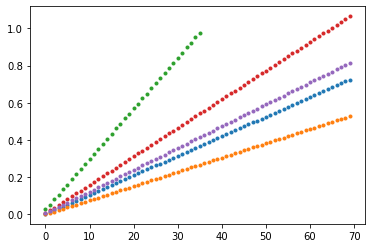

In [187]:
plt.plot(sim_df["Spikes"][0][:70], ".")
plt.plot(sim_df["Spikes"][1][:70], ".")
plt.plot(sim_df["Spikes"][2][:70], ".")
plt.plot(sim_df["Spikes"][3][:70], ".")
plt.plot(sim_df["Spikes"][4][:70], ".")

# Feature Engineering

In [188]:
sim_df_feat = pd.concat([sim_df,pd.get_dummies(sim_df["Afferent_Class"])],1)

In [189]:
%%time

def diff_feats(x, func, period=2):
    tmp_sr = pd.Series(x)
    if len(tmp_sr)>1:
        res = func(pd.Series.diff(tmp_sr, period))
        if res == np.nan:
            return -1
        return func(pd.Series.diff(tmp_sr, period))
    else:
        return -1

sim_df_feat["Spikes_diff_mean_5"] = sim_df_feat["Spikes"].apply(lambda x: diff_feats(x, period=5, func=np.mean))
sim_df_feat["Spikes_diff_mean_15"] = sim_df_feat["Spikes"].apply(lambda x: diff_feats(x, period=15, func=np.mean))


sim_df_feat["Spikes_diff_median_5"] = sim_df_feat["Spikes"].apply(lambda x: diff_feats(x, period=5, func=np.nanmedian))
sim_df_feat["Spikes_diff_median_15"] = sim_df_feat["Spikes"].apply(lambda x: diff_feats(x, period=15, func=np.nanmedian))


/home/minesh_1291/anaconda3/envs/noaa-runtime/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


CPU times: user 1min 15s, sys: 35.5 ms, total: 1min 15s
Wall time: 1min 16s


In [190]:
# tryout
# np.nanmedian(
#     pd.Series.diff(
#         pd.Series(
#             (0.001, 0.0098, 0.02, 0.0304, 0.040799999999999996, 0.0514, 0.0618, 0.0724, 0.08280000000000001, 0.09340000000000001)
#         ), 
#         5
#     )
# )

In [191]:
%%time

def diff_time_inrange(x, start=0, end=10):
    if len(x)>end:
        return x[end]-x[start]
    else:
        return -1

sim_df_feat["Spikes_diff_time_inrange_10"] = sim_df_feat["Spikes"].apply(lambda x: diff_time_inrange(x))
sim_df_feat["Spikes_diff_time_inrange_20"] = sim_df_feat["Spikes"].apply(lambda x: diff_time_inrange(x, 10, 20))

CPU times: user 74.9 ms, sys: 0 ns, total: 74.9 ms
Wall time: 76.5 ms


# Feature Explore/Viz

In [192]:
print(sim_df_feat.shape)
sim_df_feat.isna().sum()

(43470, 18)


FiringRate                        0
Spikes                            0
Frequency                         0
Afferent_Class                    0
depth                             0
Pin_Radius                        0
duration                          0
FiringRate_value                  0
Spikes_n_items                    0
PC                                0
RA                                0
SA1                               0
Spikes_diff_mean_5                0
Spikes_diff_mean_15            1127
Spikes_diff_median_5              0
Spikes_diff_median_15          1127
Spikes_diff_time_inrange_10       0
Spikes_diff_time_inrange_20       0
dtype: int64

In [193]:
sim_df_feat = sim_df_feat.dropna()

In [194]:
corr = sim_df_feat.corr()
corr.style.background_gradient(cmap='coolwarm')
# corr

,Frequency,depth,Pin_Radius,duration,FiringRate_value,Spikes_n_items,PC,RA,SA1,Spikes_diff_mean_5,Spikes_diff_mean_15,Spikes_diff_median_5,Spikes_diff_median_15,Spikes_diff_time_inrange_10,Spikes_diff_time_inrange_20
Frequency,1.000000,0.187355,0.001386,-0.009464,0.448515,0.429141,0.002644,-0.002724,0.005739,-0.463036,-0.462938,-0.465842,-0.463224,-0.455496,-0.136841
depth,0.187355,1.000000,-0.003159,0.003904,-0.333827,-0.319913,0.297602,-0.297472,-0.009706,0.225652,0.225819,0.224266,0.225253,0.224270,0.100708
Pin_Radius,0.001386,-0.003159,1.000000,-0.004410,0.002899,0.001411,-0.005563,0.005417,0.010418,-0.007127,-0.007129,-0.007160,-0.007078,-0.006997,0.000947
duration,-0.009464,0.003904,-0.004410,1.000000,-0.009280,0.210121,-0.014567,0.014433,0.009597,0.053263,0.053464,0.052155,0.053325,0.053847,0.128545
FiringRate_value,0.448515,-0.333827,0.002899,-0.009280,1.000000,0.958074,0.251066,-0.250970,-0.007204,-0.706594,-0.706869,-0.708120,-0.706480,-0.694109,-0.271502
Spikes_n_items,0.429141,-0.319913,0.001411,0.210121,0.958074,1.000000,0.237330,-0.237242,-0.006658,-0.674474,-0.674705,-0.675952,-0.674338,-0.662461,-0.253553
PC,0.002644,0.297602,-0.005563,-0.014567,0.251066,0.237330,1.000000,-0.999901,-0.008477,-0.252123,-0.252155,-0.251633,-0.252121,-0.257906,-0.051394
RA,-0.002724,-0.297472,0.005417,0.014433,-0.250970,-0.237242,-0.999901,1.000000,-0.005572,0.251625,0.251646,0.251137,0.251612,0.257372,0.051829
SA1,0.005739,-0.009706,0.010418,0.009597,-0.007204,-0.006658,-0.008477,-0.005572,1.000000,0.035765,0.036581,0.035659,0.036567,0.038369,-0.030854
Spikes_diff_mean_5,-0.463036,0.225652,-0.007127,0.053263,-0.706594,-0.674474,-0.252123,0.251625,0.035765,1.000000,0.999657,0.998597,0.999513,0.994695,0.075850


In [195]:
sim_df_feat[["Frequency","Spikes_diff_time_inrange_10","Spikes_diff_median_5"]].corr()

,Frequency,Spikes_diff_time_inrange_10,Spikes_diff_median_5
Frequency,1.000000,-0.455496,-0.465842
Spikes_diff_time_inrange_10,-0.455496,1.000000,0.992845
Spikes_diff_median_5,-0.465842,0.992845,1.000000


# export data

In [196]:
sim_df_feat[:3]

,FiringRate,Spikes,Frequency,Afferent_Class,depth,Pin_Radius,duration,FiringRate_value,Spikes_n_items,PC,RA,SA1,Spikes_diff_mean_5,Spikes_diff_mean_15,Spikes_diff_median_5,Spikes_diff_median_15,Spikes_diff_time_inrange_10,Spikes_diff_time_inrange_20
0,"(95.3,)","(0.001, 0.0098, 0.02, 0.0304, 0.0408, 0.0514, 0.0618, 0.0724, 0.0828, 0.0934, 0.104, 0.1144, 0.125, 0.1354, 0.146, 0.1566, 0.167, 0.1776, 0.1882, 0.1986, 0.2092, 0.2196, 0.2302, 0.2408, 0.2512, 0....",95,PC,1.60,1.070,1.7630,95.3125,168,1,0,0,0.052594,0.157829,0.052734,0.157837,0.103027,0.105225
1,"(130.6,)","(0.001, 0.0064, 0.013, 0.0206, 0.028, 0.0358, 0.0432, 0.051, 0.0584, 0.0664, 0.0738, 0.0818, 0.0892, 0.0972, 0.1046, 0.1124, 0.1198, 0.1278, 0.1353, 0.1432, 0.1506, 0.1586, 0.166, 0.174, 0.1814, 0...",65,PC,0.58,1.390,1.0340,130.6250,135,1,0,0,0.038393,0.115272,0.038513,0.115234,0.072815,0.076843
2,"(35.25,)","(0.0262, 0.05, 0.0798, 0.104, 0.1344, 0.1584, 0.189, 0.2133, 0.2434, 0.2673, 0.298, 0.322, 0.3525, 0.3765, 0.407, 0.4312, 0.4617, 0.4856, 0.516, 0.54, 0.571, 0.5947, 0.625, 0.6494, 0.6797, 0.7036,...",55,PC,1.30,0.825,1.0215,35.2500,36,1,0,0,0.136173,0.408728,0.133484,0.406006,0.271973,0.272705


In [199]:
feature_cols = ["PC", "RA", "SA1","FiringRate_value","Spikes_n_items", "depth","Pin_Radius","duration",
                "Spikes_diff_time_inrange_10",
                "Spikes_diff_time_inrange_20", 
                "Spikes_diff_mean_5",
                "Spikes_diff_mean_15"] # "depth", "Pin_Radius", "Spikes_diff_mean",
target_col = "Frequency"

In [200]:
sim_df_feat[feature_cols+[target_col]].to_csv("../data/dataset_v3.csv")